<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.580620,74.172760,26.683045,165.436424,135.381865,30.054560
1,0.0,1.0,47.355747,67.679948,12.398954,137.434648,123.571240,13.863409
2,0.0,2.0,45.085528,29.093149,-0.347255,83.831422,89.248534,-5.417112
3,0.0,3.0,24.545639,90.808514,-24.521553,100.832600,122.825619,-21.993019
4,0.0,4.0,20.605711,70.456988,-29.075316,71.987383,102.304169,-30.316786
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.301818,82.548743,-16.957486,135.893074,151.969843,-16.076769
249996,999.0,246.0,99.119776,59.630992,12.762569,181.513338,167.801201,13.712137
249997,999.0,247.0,47.471418,90.649689,-26.539540,121.581566,147.227375,-25.645809
249998,999.0,248.0,24.127690,67.404819,-4.994375,96.538135,103.198193,-6.660058


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    54.580620  74.172760  26.683045  165.436424  135.381865   
      1.0    47.355747  67.679948  12.398954  137.434648  123.571240   
      2.0    45.085528  29.093149  -0.347255   83.831422   89.248534   
      3.0    24.545639  90.808514 -24.521553  100.832600  122.825619   
      4.0    20.605711  70.456988 -29.075316   71.987383  102.304169   
...                ...        ...        ...         ...         ...   
999.0 245.0  60.301818  82.548743 -16.957486  135.893074  151.969843   
      246.0  99.119776  59.630992  12.762569  181.513338  167.801201   
      247.0  47.471418  90.649689 -26.539540  121.581566  147.227375   
      248.0  24.127690  67.404819  -4.994375   96.538135  103.198193   
      249.0  75.361830  72.618437 -45.516990  112.463277  157.143496   

                 e_hat  
rep   index             
0.0   0.0    30.054560  
      1.0    13.863409  
      2.0    -5.417112  
      3.0   -21.993019  
      4.0   -30.316786  
...                ...  
999.0 245.0 -16.076769  
      246.0  13.712137  
      247.0 -25.645809  
      248.0  -6.660058  
      249.0 -44.680219  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    54.580620  74.172760  26.683045  165.436424  135.381865   
      1.0    47.355747  67.679948  12.398954  137.434648  123.571240   
      2.0    45.085528  29.093149  -0.347255   83.831422   89.248534   
      3.0    24.545639  90.808514 -24.521553  100.832600  122.825619   
      4.0    20.605711  70.456988 -29.075316   71.987383  102.304169   
...                ...        ...        ...         ...         ...   
999.0 245.0  60.301818  82.548743 -16.957486  135.893074  151.969843   
      246.0  99.119776  59.630992  12.762569  181.513338  167.801201   
      247.0  47.471418  90.649689 -26.539540  121.581566  147.227375   
      248.0  24.127690  67.404819  -4.994375   96.538135  103.198193   
      249.0  75.361830  72.618437 -45.516990  112.463277  157.143496   

                 e_hat  
rep   index             
0.0   0.0    30.054560  
      1.0    13.863409  
      2.0    -5.417112  
      3.0   -21.993019  
      4.0   -30.316786  
...                ...  
999.0 245.0 -16.076769  
      246.0  13.712137  
      247.0 -25.645809  
      248.0  -6.660058  
      249.0 -44.680219  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.580620,74.172760,26.683045,165.436424,135.381865,30.054560
1,0.0,1.0,47.355747,67.679948,12.398954,137.434648,123.571240,13.863409
2,0.0,2.0,45.085528,29.093149,-0.347255,83.831422,89.248534,-5.417112
3,0.0,3.0,24.545639,90.808514,-24.521553,100.832600,122.825619,-21.993019
4,0.0,4.0,20.605711,70.456988,-29.075316,71.987383,102.304169,-30.316786
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.301818,82.548743,-16.957486,135.893074,151.969843,-16.076769
249996,999.0,246.0,99.119776,59.630992,12.762569,181.513338,167.801201,13.712137
249997,999.0,247.0,47.471418,90.649689,-26.539540,121.581566,147.227375,-25.645809
249998,999.0,248.0,24.127690,67.404819,-4.994375,96.538135,103.198193,-6.660058


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    54.580620  74.172760  26.683045  165.436424  135.381865   
      1.0    47.355747  67.679948  12.398954  137.434648  123.571240   
      2.0    45.085528  29.093149  -0.347255   83.831422   89.248534   
      3.0    24.545639  90.808514 -24.521553  100.832600  122.825619   
      4.0    20.605711  70.456988 -29.075316   71.987383  102.304169   
...                ...        ...        ...         ...         ...   
999.0 245.0  60.301818  82.548743 -16.957486  135.893074  151.969843   
      246.0  99.119776  59.630992  12.762569  181.513338  167.801201   
      247.0  47.471418  90.649689 -26.539540  121.581566  147.227375   
      248.0  24.127690  67.404819  -4.994375   96.538135  103.198193   
      249.0  75.361830  72.618437 -45.516990  112.463277  157.143496   

                 e_hat  
rep   index             
0.0   0.0    30.054560  
      1.0    13.863409  
      2.0    -5.417112  
      3.0   -21.993019  
      4.0   -30.316786  
...                ...  
999.0 245.0 -16.076769  
      246.0  13.712137  
      247.0 -25.645809  
      248.0  -6.660058  
      249.0 -44.680219  

[250000 rows x 6 columns]

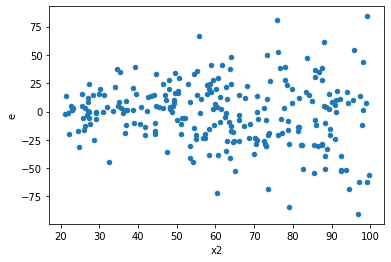

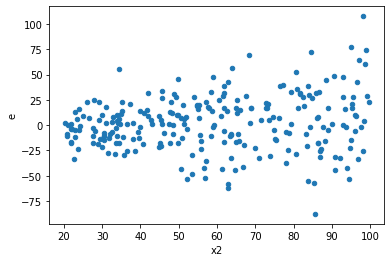

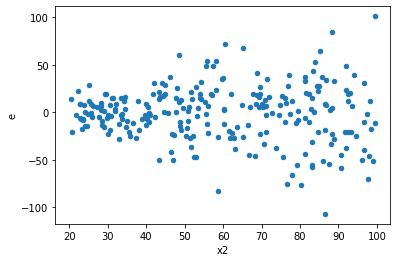

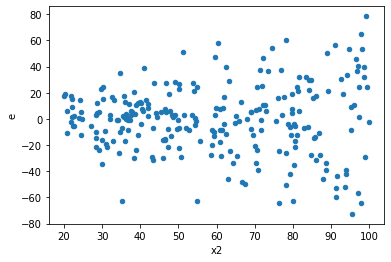

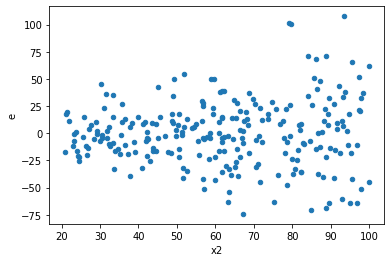

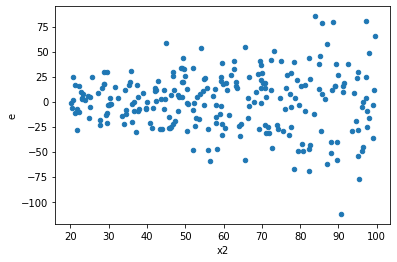

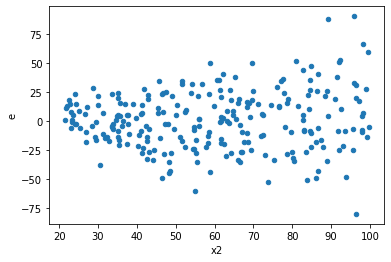

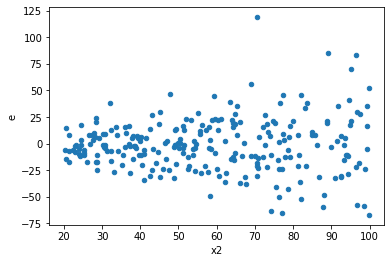

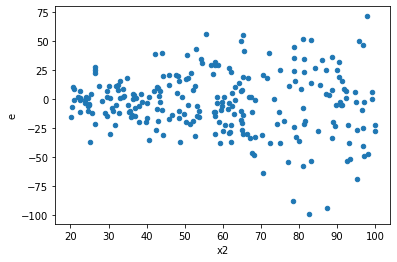

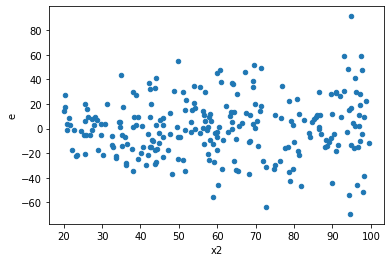

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,140.0,106.0,76884.15465149553,101528.3034373668,549.172533224968,957.814183371385,1.7441043122581248,0.002847990860390892,0.9985760045698046,0.001423995430195446,Reject001=0 : Heteroscedasticity
1.0,144.0,102.0,68033.24654953014,102078.30183302097,472.45310103840376,1000.7676650296174,2.118237054281223,7.653793660589159e-05,0.999961731031697,3.8268968302945794e-05,Reject001=0 : Heteroscedasticity
3.0,148.0,98.0,67686.80600419482,97407.1571505408,457.34328381212714,993.9505831687837,2.1733140473471795,5.3130968109549315e-05,0.9999734345159452,2.6565484054774657e-05,Reject001=0 : Heteroscedasticity
6.0,111.0,135.0,47208.36028753185,103211.0636373737,425.30054313091756,764.5263973138793,1.7976144391580051,0.0011800086137814247,0.9994099956931093,0.0005900043068907124,Reject001=0 : Heteroscedasticity
7.0,134.0,112.0,46847.122271290275,105632.56395864712,349.60539008425576,943.1478924879208,2.6977498609521433,1.256316015663117e-07,0.9999999371841992,6.281580078315585e-08,Reject001=0 : Heteroscedasticity
11.0,131.0,115.0,82576.74503275663,128374.62391549803,630.3568323111193,1116.3010775260698,1.770903431685353,0.0018575613738787133,0.9990712193130606,0.0009287806869393567,Reject001=0 : Heteroscedasticity
12.0,129.0,117.0,48449.67520837785,127879.29702735148,375.5788775843244,1092.9854446782178,2.9101355531710444,1.044701458674524e-08,0.9999999947764927,5.22350729337262e-09,Reject001=0 : Heteroscedasticity
13.0,118.0,128.0,84273.8211168798,164854.36060893012,714.1849247193203,1287.9246922572665,1.8033490314338825,0.0011440003929519271,0.999427999803524,0.0005720001964759636,Reject001=0 : Heteroscedasticity
15.0,110.0,136.0,59073.90215583682,89439.14810593177,537.0354741439711,657.6407948965572,1.2245760784142419,0.2608836163615864,0.8695581918192068,0.1304418081807932,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,140.0,106.0,76884.15465149553,101528.3034373668,549.172533224968,957.814183371385,1.7441043122581248,0.002847990860390892,Reject001=0 : Heteroscedasticity
1.0,144.0,102.0,68033.24654953014,102078.30183302097,472.45310103840376,1000.7676650296174,2.118237054281223,7.653793660589159e-05,Reject001=0 : Heteroscedasticity
2.0,122.0,124.0,132917.6683939199,72985.76884869805,1089.489085196065,588.5949100701456,0.5402485606032683,0.0007307418395725332,Reject001=0 : Heteroscedasticity
3.0,148.0,98.0,67686.80600419482,97407.1571505408,457.34328381212714,993.9505831687837,2.1733140473471795,5.3130968109549315e-05,Reject001=0 : Heteroscedasticity
4.0,135.0,111.0,171725.06659486814,48129.47221250069,1272.0375303323567,433.59884876126745,0.3408695407343659,3.6980010803322012e-09,Reject001=0 : Heteroscedasticity
5.0,98.0,148.0,108098.69500377674,101845.67075253898,1103.0479082018035,688.1464240036418,0.623859053525121,0.012656874979325201,Reject001=1 : Homoscedasticity
6.0,111.0,135.0,47208.36028753185,103211.0636373737,425.30054313091756,764.5263973138793,1.7976144391580051,0.0011800086137814247,Reject001=0 : Heteroscedasticity
7.0,134.0,112.0,46847.122271290275,105632.56395864712,349.60539008425576,943.1478924879208,2.6977498609521433,1.256316015663117e-07,Reject001=0 : Heteroscedasticity
8.0,133.0,113.0,121589.42259844819,43645.87179920212,914.2061849507382,386.24665309028427,0.42249402754926346,2.1362524403516343e-06,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    811
Reject001=1 : Homoscedasticity      189
Name: Result_test, dtype: int64